<a href="https://colab.research.google.com/github/JWiseman-git/ml_sandbox/blob/main/tensorflow_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intro

Covering the basics on tensorflow in prep for an interview

- building some basic flows to get a feel for the tools
- Follows this build pattern: load → build → compile → train → evaluate → predict
- Tensorflow is the engine - handles tensors, automatic differentiation, GPU/TPU execution, distributed training, graph optimisation.
- keras is the API interface: it gives you a clean, Pythonic way to define, train, and evaluate neural networks without touching the low-level plumbing.

In [1]:
import tensorflow as tf

# constant is used to create tensors
tensor3d = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])


### Design guide

**Which activation function to use**
- For most of the hidden layers using ReLU is fine. Cheap to compute and avoids vanishing gradient
- For binary classification - use sigmoid - output is 0 or 1.
- For multi class classification - use softmax - outputs 1 - probability of a given class
- For regression - no activation function needed - use linear

**which loss function to use**

- Regression: Mean Squared Error - errors are penalised quadratically - sensitive to outliers
- Regression: MAE - outliers exist but you want robust predictions - les sensitive to outliers
- binary classification - binary cross entropy - output is a probability
- multi class classification - categorical cross entropy - use when class being predicted


**which optimizer to use**

- SGD + Momentum - faster convergence than vanilla - better on large scale data and image classification
- Adam optimizer - fast convergence, usually default - smaller datasets and NLP tasks

In [4]:
from tensorflow import keras

# 1. Load and prepare data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize - performed to speed up training - faster converge

# Always 255 for image normalization

# 2. Build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 3. Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Train
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# 5. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)

# 6. Predict
predictions = model.predict(X_test[:5])

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8618 - loss: 0.4856 - val_accuracy: 0.9463 - val_loss: 0.1859
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9586 - loss: 0.1409 - val_accuracy: 0.9657 - val_loss: 0.1209
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9726 - loss: 0.0922 - val_accuracy: 0.9674 - val_loss: 0.1090
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9799 - loss: 0.0695 - val_accuracy: 0.9721 - val_loss: 0.0948
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9847 - loss: 0.0526 - val_accuracy: 0.9751 - val_loss: 0.0890
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.0919
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


### Vanishing gradient problem

- occurs in backpropagation when gradients become too small - making it difficult for the model to coverge
- occurs when using sigmoid or Tanh - derivatives are less than 1 meaning earlier layers cannot converge

**Fixes**

- using ReLU prevents vanishing gradient problem
- Batch Normalization  

In [2]:
inputs = keras.Input(shape=(784,))
x = keras.layers.Dense(256, activation='relu')(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Flatten converts - N-D to 1-D
# Dropout

In [5]:
# Binary classification
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

# Multi-class with integer labels (most common)
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

# Multi-class with one-hot labels
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

(60000, 28, 28)
(60000,)
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9873 - loss: 0.0419 - val_accuracy: 0.9754 - val_loss: 0.0878
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9913 - loss: 0.0308 - val_accuracy: 0.9760 - val_loss: 0.0863
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9934 - loss: 0.0219 - val_accuracy: 0.9745 - val_loss: 0.0918
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9956 - loss: 0.0169 - val_accuracy: 0.9753 - val_loss: 0.0949
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9962 - loss: 0.0158 - val_accuracy: 0.9765 - val_loss: 0.0972
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9967 - loss: 0.0121 - val_accuracy: 0.9744 - val_loss: 0.1016
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9966 - loss: 0.0113 - val_accuracy: 0.9747 - val_loss: 0.1035
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy

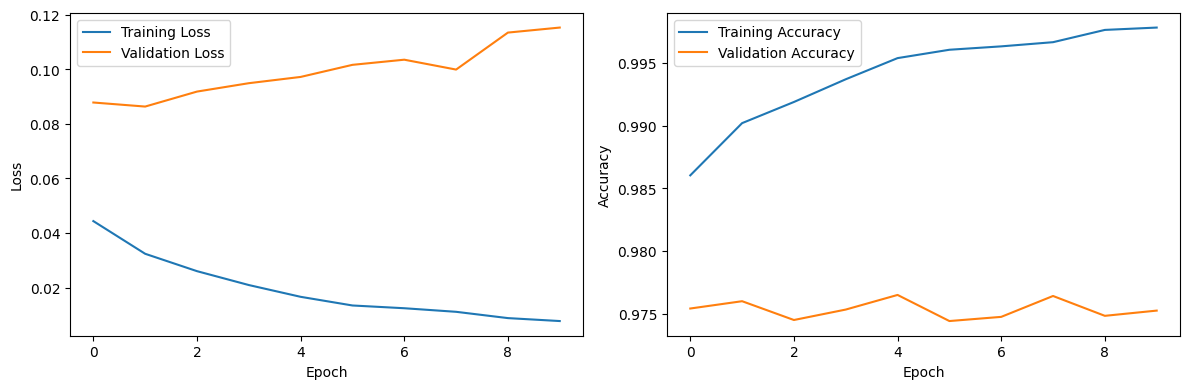

In [12]:
print(X_train.shape)
print(y_train.shape)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=10,                        # Number of passes through data
    batch_size=32,                    # Samples per gradient update
    validation_split=0.2,             # Use 20% of training data for validation
    # # OR
    # validation_data=(X_val, y_val),   # Explicit validation set
    # verbose=1                         # 0=silent, 1=progress bar, 2=one line/epoch
)

# history.history is a dict with training metrics
print(history.history.keys())
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plot training curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

print()

# For classification: get predicted class
predicted_classes = tf.argmax(predictions, axis=1)

# For single sample
single_prediction = model.predict(X_test[0:1])  # Keep batch dimension

Test Accuracy: 0.9759
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


### Overfitting

The above example demonstrates overfitting

- Training loss decreases while validation loss increases
- Large gap between training and validation accuracy
- Model memorizes training data instead of learning patterns

Resolve using:
- drop out techniques - randomly set a fraction of inputs to 0 during training
- stopping early when validation loss stops improving
- reduce model complexity - prevents building to fit one dataset
- data augementation using images

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Add Flatten layer here
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Metric to monitor
    patience=5,               # Epochs to wait for improvement
    restore_best_weights=True # Restore model from best epoch
)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

print(X_train.shape)
print(y_train.shape)

model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(60000, 28, 28)
(60000,)
Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7910 - loss: 0.6542 - val_accuracy: 0.9558 - val_loss: 0.1488
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9346 - loss: 0.2230 - val_accuracy: 0.9640 - val_loss: 0.1209
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9465 - loss: 0.1740 - val_accuracy: 0.9706 - val_loss: 0.0967
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9571 - loss: 0.1415 - val_accuracy: 0.9718 - val_loss: 0.0988
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9600 - loss: 0.1304 - val_accuracy: 0.9723 - val_loss: 0.0917
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9612 - loss: 0.1262 - val_accuracy: 0.9745 - val_loss: 0.0860
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9645 - loss: 0.1185 - val_accuracy: 0.9747 - val_loss: 0.0882
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/